<a href="https://colab.research.google.com/github/rajayush01/Plant-Disease-Detection-System-for-Sustainable-Agriculture/blob/main/Plant_Disease_Detection_System_for_Sustainable_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'drive/MyDrive/Dataset/Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70359 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'drive/MyDrive/Dataset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Ensure the drive is properly mounted

import os
os.makedirs('/content/drive/MyDrive/checkpoints', exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_01.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_02.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_03.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_04.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_05.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_06.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_07.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_08.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_09.weights.h5')

In [ ]:
cnn.load_weights('drive/MyDrive/checkpoints/plant_disease_model_epoch_10.weights.h5')

In [ ]:
checkpoint_path = 'drive/MyDrive/checkpoints/plant_disease_model_epoch_{epoch:02d}.weights.h5' # Added '.weights' to the filename
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=False,  # Save every epoch, not just the best
    save_weights_only=True,  # Save only weights
    verbose=1
)

cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    initial_epoch=9,  # Start from the saved epoch
    callbacks=[checkpoint]
)

In [87]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
# Save training accuracy to a file in Google Drive
with open('drive/MyDrive/training_accuracy.txt', 'w') as f:
  f.write(f'Training accuracy: {train_acc}')

print('Training accuracy saved to drive/MyDrive/training_accuracy.txt')

2199/2199 ━━━━━━━━━━━━━━━━━━━━ 8266s 4s/step - accuracy: 0.9946 - loss: 0.0159
Training accuracy: 0.9945849180221558


In [88]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)
# Save validation accuracy to a file in Google Drive
with open('drive/MyDrive/validation_accuracy.txt', 'w') as f:
  f.write(f'Validation accuracy: {train_acc}')

print('Training accuracy saved to drive/MyDrive/validation_accuracy.txt')

550/550 ━━━━━━━━━━━━━━━━━━━━ 3125s 6s/step - accuracy: 0.9726 - loss: 0.0963
Validation accuracy: 0.970919668674469


In [89]:
with open('drive/MyDrive/training_accuracy.txt', 'w') as f:
  f.write(f'Training accuracy: {train_acc}')

print('Training accuracy saved to drive/MyDrive/training_accuracy.txt')

Training accuracy saved to drive/MyDrive/training_accuracy.txt


In [90]:
# Save validation accuracy to a file in Google Drive
with open('drive/MyDrive/validation_accuracy.txt', 'w') as f:
  f.write(f'Validation accuracy: {train_acc}')

print('Training accuracy saved to drive/MyDrive/validation_accuracy.txt')

Training accuracy saved to drive/MyDrive/validation_accuracy.txt


In [ ]:
cnn.save('drive/MyDrive/trained_plant_disease_model.keras')

In [92]:
class_name = validation_set.class_names

In [93]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'drive/MyDrive/Dataset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [94]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 981s 56ms/step


In [95]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [96]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [97]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [98]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [99]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.80      0.85       504
                                 Apple___Black_rot       0.97      0.92      0.94       497
                          Apple___Cedar_apple_rust       0.83      0.96      0.89       440
                                   Apple___healthy       0.76      0.92      0.84       502
                               Blueberry___healthy       0.85      0.97      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.90      0.92       421
                 Cherry_(including_sour)___healthy       0.97      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.88      0.86       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.95      0.

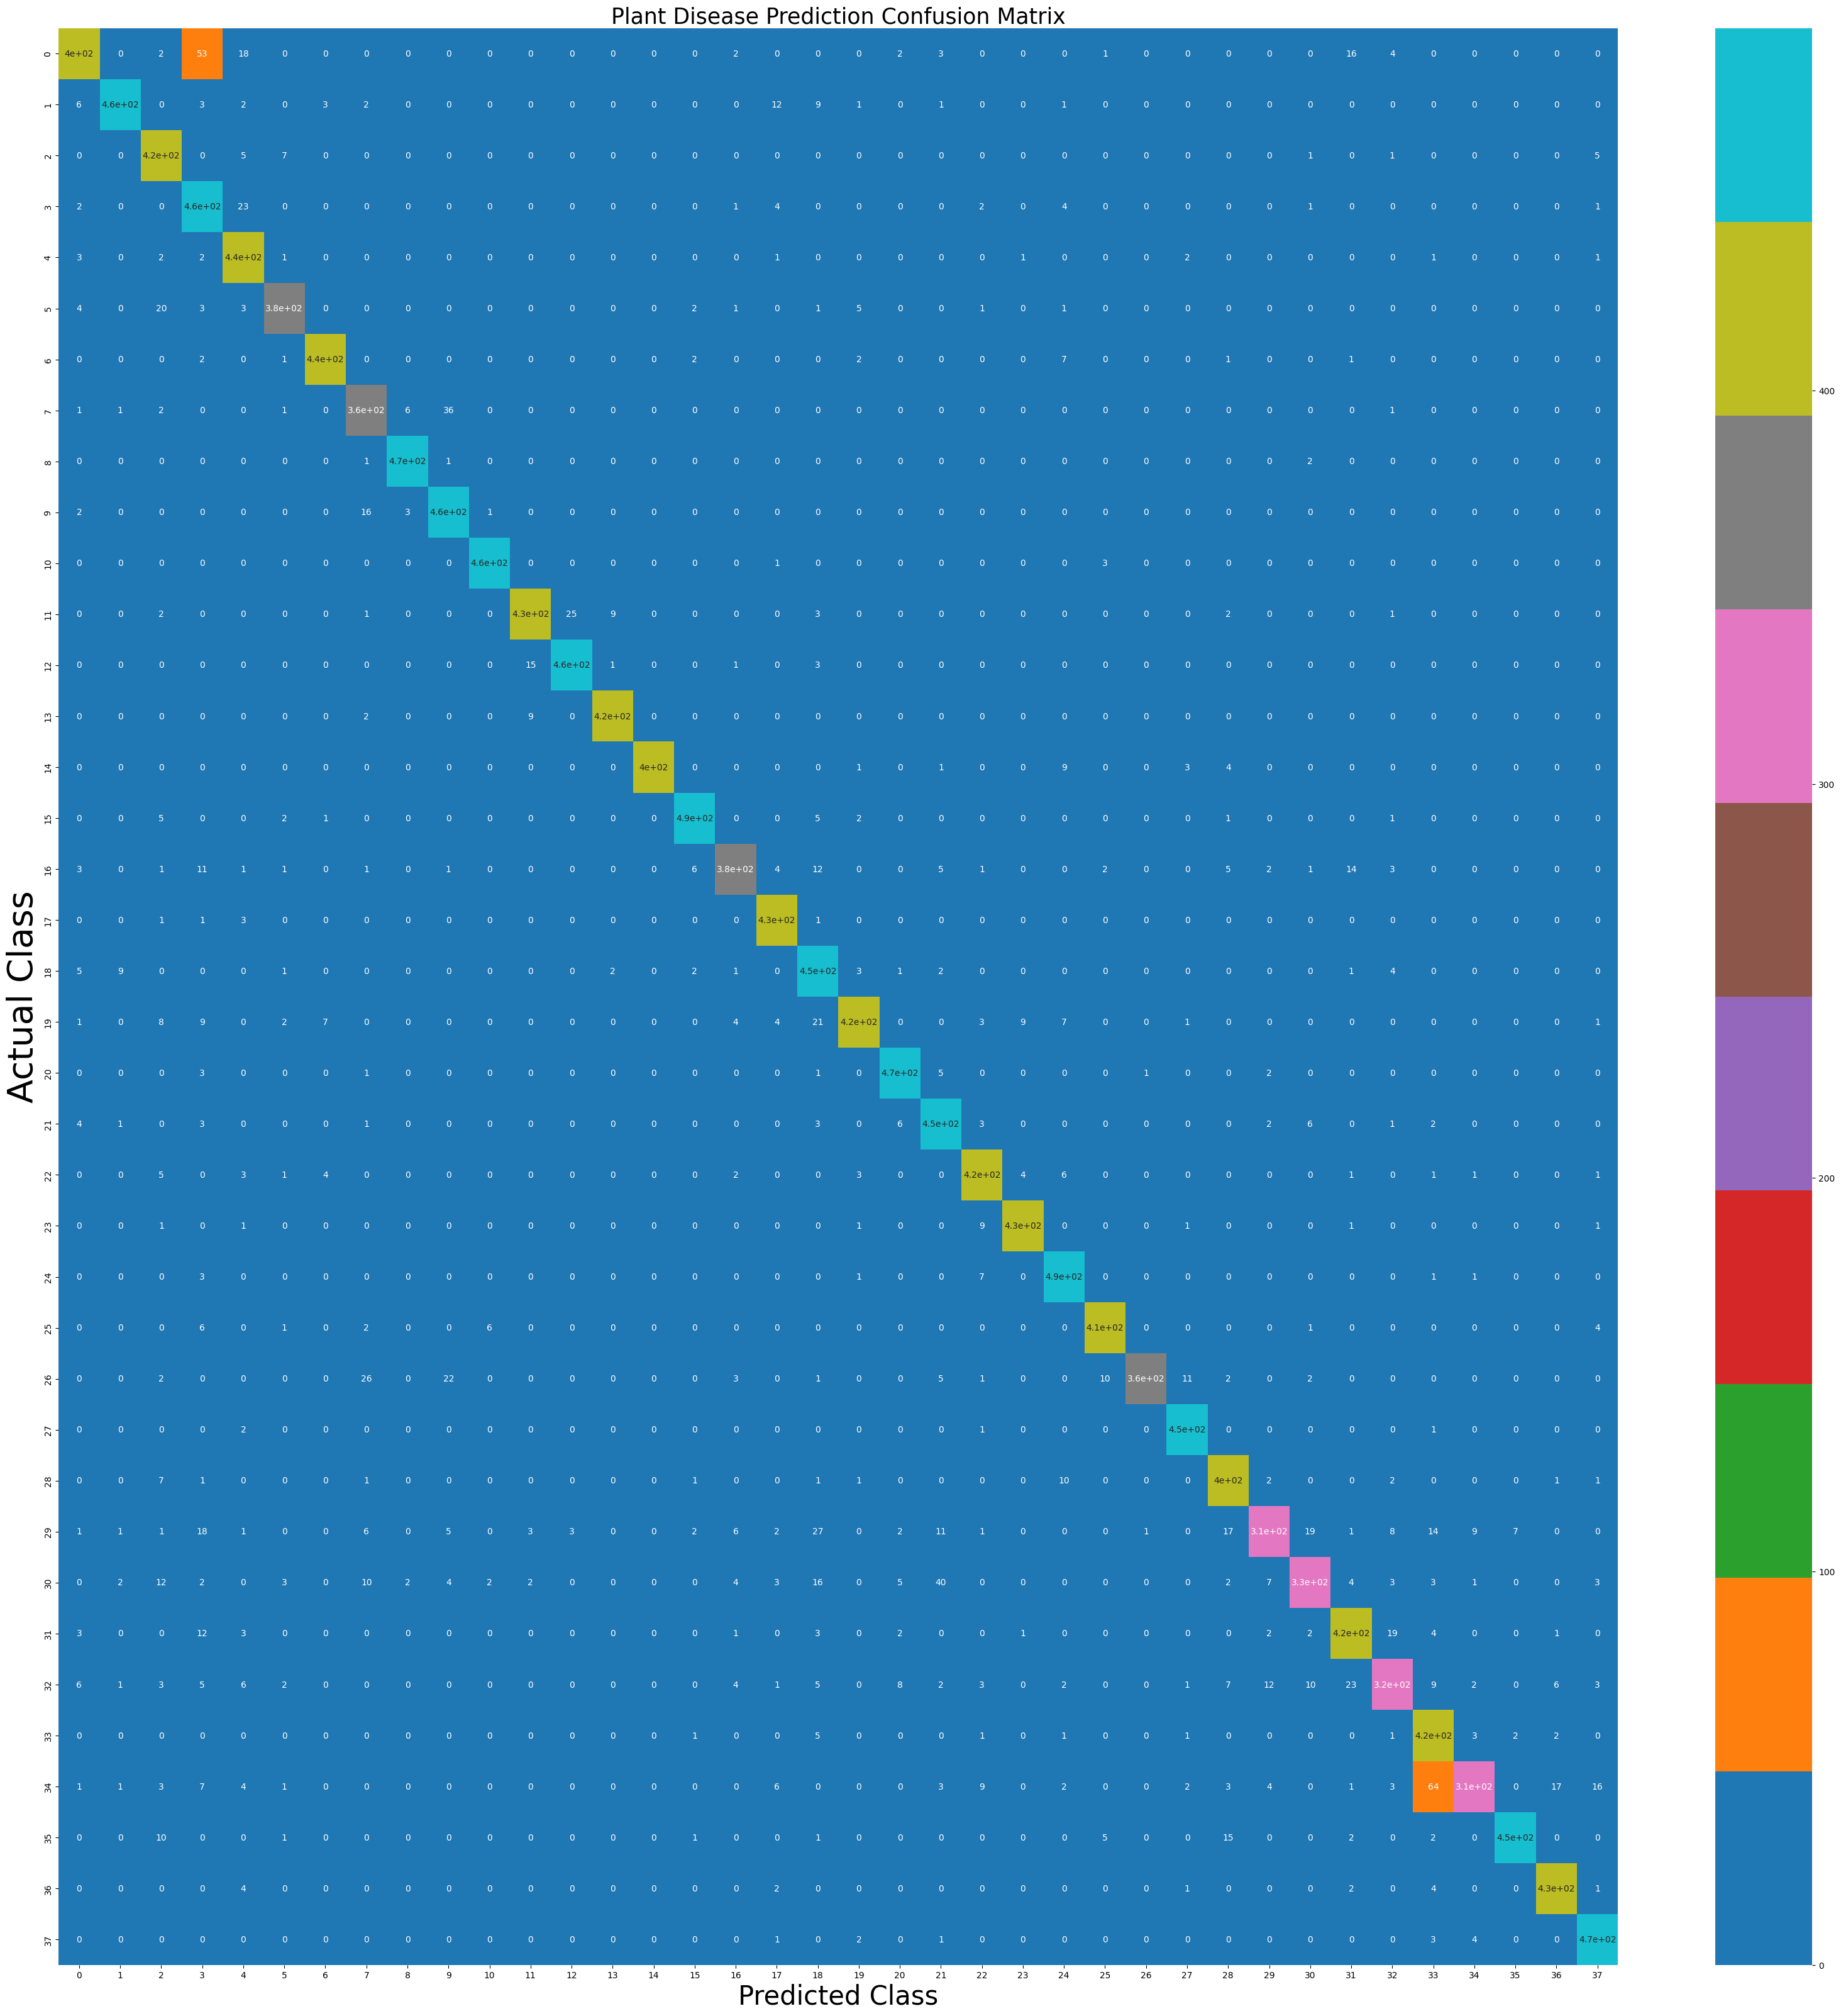

In [100]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='tab10')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()